In [1]:
from import_modules_fput import *

with open('config_fput.yaml', 'r') as file:
    cfg = yaml.safe_load(file)

In [2]:
folder_path = r"data/"

sim = SIM(cfg["sim"]["N"], cfg["sim"]["timesteps"], cfg["sim"]["dt"], cfg["sim"]["alpha"], cfg["sim"]["beta"])

run = "no"

if run == "yes":
    print("No saved data, running simulation.")
    
    qs, ps = sim.integrate()
    # np.save("data_qs_2.npy", qs)
    # np.save("data_ps_2.npy", ps)

else:
    print("Found some saved data, skipping simulation.")
    
    qs = np.load(folder_path+r"data_qs_1.npy")
    ps = np.load(folder_path+r"data_ps_1.npy")

No saved data, running simulation.


In [ ]:
energy = sim.energy(ps, qs, cfg["sim"]["alpha"], cfg["sim"]["beta"])

init H: 1.3177856934944328  init H/N: 0.1647232116868041


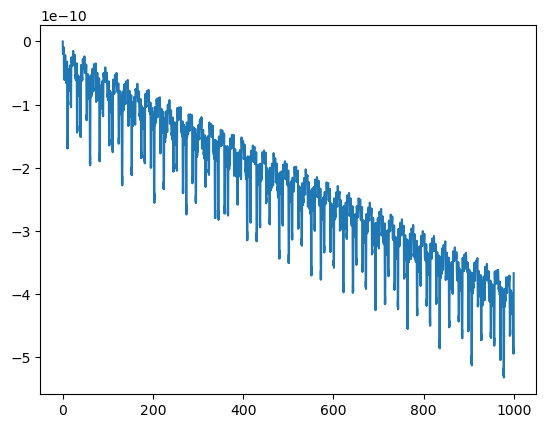

In [ ]:
print("init H:", energy[0], " init H/N:", energy[0]/cfg["sim"]["N"])
plt.plot(np.arange(0, cfg["sim"]["timesteps"], cfg["sim"]["dt"]), (energy - energy[0]) / energy[0])
plt.savefig(folder_path + 'energy.pdf')

plt.show()

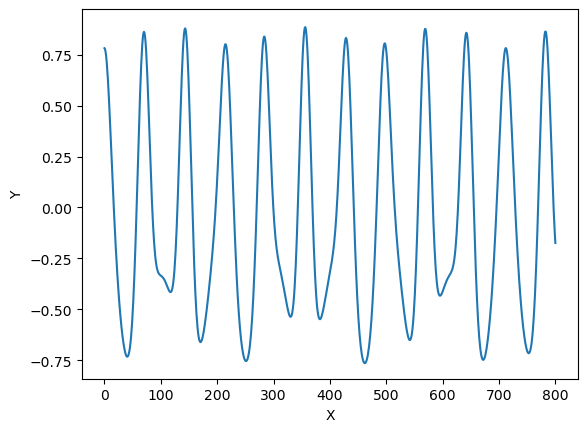

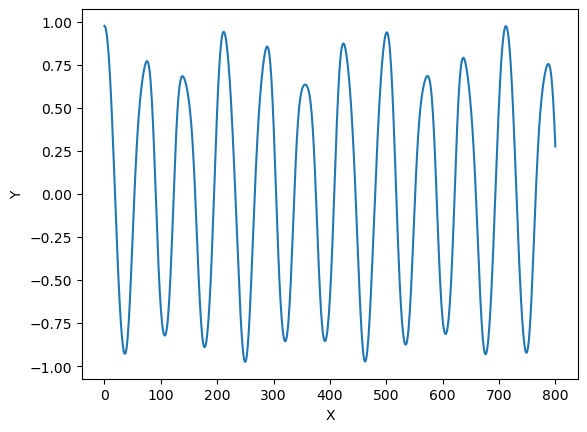

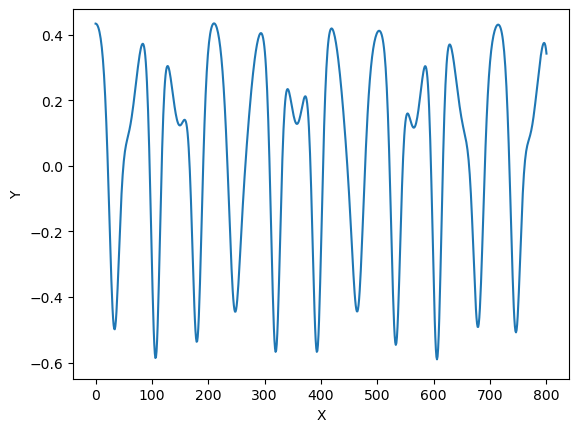

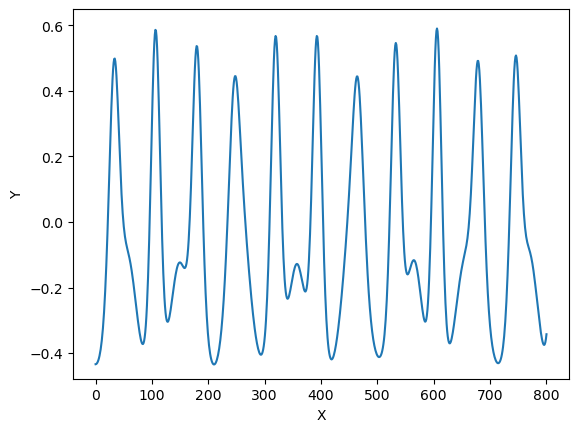

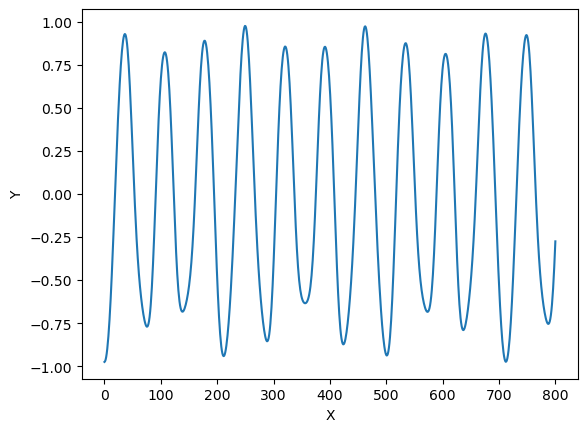

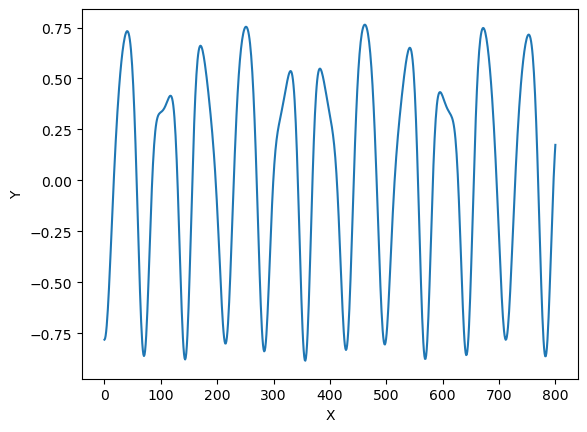

In [ ]:
# Plot first n steps

limit = 800

for particles in range(1, cfg["sim"]["N"]-1):
    plt.plot(np.linspace(0, limit, limit), qs[:limit, particles], color="tab:blue")

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.ylim(-1.1*np.abs(np.min(qs[:limit, particles])), 1.1*np.max(qs[:limit, particles]))

    # Show the plot
    plt.show()